# Cordex domains

The domain module should give some tools to work with preconfigured or user defined domains. Domains are defined as xarray datasets that will contain dimensions and coodinates according to CF-conventions.

**NOTE**: The domain module mostly focuses on working with rotated cordex domains and how they are defined in the [cordex archive specifications](https://is-enes-data.github.io/cordex_archive_specifications.pdf). However, there are some regional models that use different mappings instead of `rotated_pole` or `rotated_latitude_longitude` which we focus on. Any expertise working with those different mappings is highly welcome!

## Working with domain information

In [6]:
from cordex import domain as dm

The domain module contains some useful functions to work with cordex meta data, e.g., you can get some domain grid information using

In [7]:
dm.domain_info('EUR-11')

{'short_name': 'EUR-11',
 'region': 4,
 'long_name': 'Europe',
 'nlon': 424,
 'nlat': 412,
 'll_lon': -28.375,
 'ur_lon': 18.155,
 'll_lat': -23.375,
 'ur_lat': 21.835,
 'dlon': 0.11,
 'dlat': 0.11,
 'pollon': -162.0,
 'pollat': 39.25}

The domain information is stored in a number of csv tables. The module contains a tables dictionary that sorts the tables by resolution or project, e.g.

In [8]:
dm.tables.keys()

dict_keys(['cordex-core', 'cordex', 'cordex-fps', 'cordex-high-res'])

All available cordex domains are in those tables:

In [9]:
import pandas as pd
pd.concat(dm.tables.values())

,region,long_name,nlon,nlat,ll_lon,ur_lon,ll_lat,ur_lat,dlon,dlat,pollon,pollat
short_name,,,,,,,,,,,,
SAM-22,1,South America,292,334,143.81000,207.83000,-38.39000,34.87000,0.2200,0.2200,-56.06,70.60
CAM-22,2,Central America,420,226,-52.91000,39.27000,-28.71000,20.79000,0.2200,0.2200,113.98,75.74
NAM-22,3,North America,310,260,-33.99000,33.99000,-28.51000,28.47000,0.2200,0.2200,83.00,42.50
EUR-22,4,Europe,212,206,-28.32000,18.10000,-23.32000,21.78000,0.2200,0.2200,-162.00,39.25
AFR-22,5,Africa,388,402,-24.75000,60.39000,-45.87000,42.35000,0.2200,0.2200,180.00,90.00
WAS-22,6,South Asia,386,260,-32.23000,52.47000,-21.67000,35.31000,0.2200,0.2200,-123.34,79.95
EAS-22,7,East Asia,396,251,-43.23000,43.67000,-22.10000,32.90000,0.2200,0.2200,296.30,61.00
CAS-22,8,Central Asia,306,200,-34.43000,32.67000,-20.79000,22.99000,0.2200,0.2200,-103.39,43.48
AUS-22,9,Australasia,400,258,142.05000,229.83000,-22.99000,33.55000,0.2200,0.2200,141.38,60.31


## `EUR-11` example

The heart of the module are some functions that create a dataset from the grid information, e.g.

In [10]:
eur11 = dm.cordex_domain('EUR-11', dummy='topo')
eur11

<xarray.Dataset>
Dimensions:                     (rlat: 412, rlon: 424)
Coordinates:
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.05 18.16
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.73 21.84
    lon                         (rlat, rlon) float64 -10.06 -9.964 ... 64.96
    lat                         (rlat, rlon) float64 21.99 22.03 ... 66.75 66.69
Data variables:
    rotated_latitude_longitude  int32 0
    topo                        (rlat, rlon) float32 ...

The `dummy='topo'` argument means, we want a dummy variable in the dataset to see how the domain looks like. For the dummy topography, we use the `cdo topo` operator in the background. So maybe you have to install `python-cdo`, e.g., `conda install -c conda-forge python-cdo`. Working with xarray datasets means, that we can use all the nice functions of xarray including plotting, e.g.,

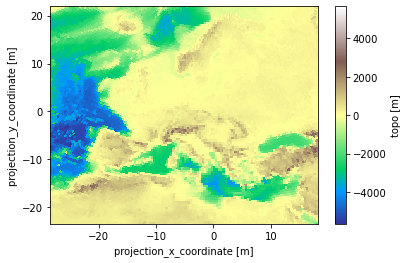

In [11]:
eur11.topo.plot(cmap='terrain')

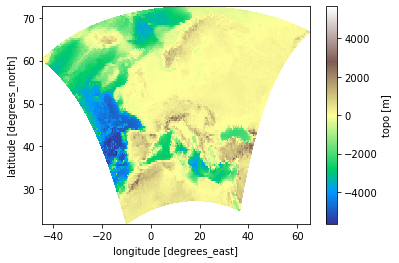

In [12]:
eur11.topo.plot(x='lon', y='lat', cmap='terrain')

Let's define a slightly more sophisticated plotting function that uses cartopy for the right [projection](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html) with a rotated pole:

In [13]:
def plot(da, pole, vmin=None, vmax=None, borders=True, title=''):
    """plot a domain using the right projection with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,10))
    projection = ccrs.PlateCarree()
    transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
    #ax = plt.axes(projection=projection)
    ax = plt.axes(projection=transform)
    #ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                      xlocs=range(-180,180,10), ylocs=range(-90,90,5))
    da.plot(ax=ax, cmap='terrain', transform=transform, vmin=vmin, vmax=vmax, x='rlon', y='rlat')
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    if borders: ax.add_feature(cf.BORDERS)
    ax.set_title('')

In [14]:
pole = eur11.rotated_latitude_longitude.grid_north_pole_longitude, eur11.rotated_latitude_longitude.grid_north_pole_latitude
pole

(-162.0, 39.25)

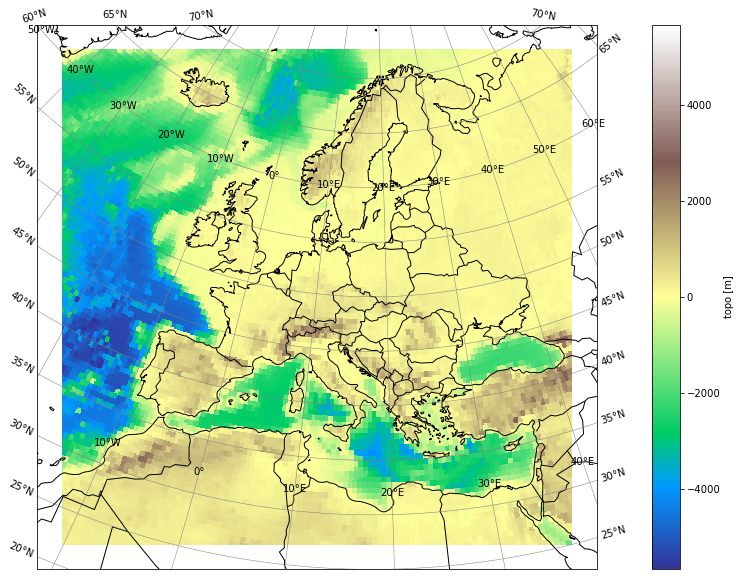

In [15]:
plot(eur11.topo, pole)

## User defined domain

The domains are actually created from csv tables. To checkout the tables you can have a look at `dm.TABLES`. This is a dictionary of dataframes created during the import of the model from a number of csv tables that define standard cordex domains. E.g., available tables are:

In [16]:
dm.tables['cordex-high-res']

,region,long_name,nlon,nlat,ll_lon,ur_lon,ll_lat,ur_lat,dlon,dlat,pollon,pollat
short_name,,,,,,,,,,,,
SAM-11,1,South America,584,668,143.755,207.885,-38.445,34.925,0.11,0.11,-56.06,70.60
CAM-11,2,Central America,840,452,-52.965,39.325,-28.765,20.845,0.11,0.11,113.98,75.74
NAM-11,3,North America,620,520,-34.045,34.045,-28.565,28.525,0.11,0.11,83.00,42.50
EUR-11,4,Europe,424,412,-28.375,18.155,-23.375,21.835,0.11,0.11,-162.00,39.25
AFR-11,5,Africa,776,804,-24.805,60.445,-45.925,42.405,0.11,0.11,180.00,90.00
WAS-11,6,South Asia,772,520,-32.285,52.525,-21.725,35.365,0.11,0.11,-123.34,79.95
EAS-11,7,East Asia,812,668,-41.085,48.125,-27.005,46.365,0.11,0.11,-64.78,77.61
CAS-11,8,Central Asia,612,400,-34.485,32.725,-20.845,23.045,0.11,0.11,-103.39,43.48
AUS-11,9,Australasia,800,516,141.995,229.885,-23.045,33.605,0.11,0.11,141.38,60.31


The domains are created using the `create_dataset` function, e.g.:

In [17]:
help(dm.create_dataset)

Help on function create_dataset in module cordex.domain:

create_dataset(nlon, nlat, dlon, dlat, ll_lon, ll_lat, pollon, pollat, dummy=False, **kwargs)
    Create domain dataset from grid information.
    
    Parameters
    ----------
    nlon : int
        longitudal number of grid boxes
    nlat : int
        latitudal number of grid boxes
    dlon : float
        longitudal resolution (degrees)
    dlat : float
        latitudal resolution (degrees)
    ll_lon : float
        lower left rotated longitude (degrees)
    ll_lat : float
        lower left rotated latitude (degrees)
    pollon : float
        pol longitude (degrees)
    pollat : float
        pol latitude (degrees)



Let's create the EUR-11 domain manually from the numbers in the table:

In [18]:
eur11_user = dm.create_dataset(nlon=424, nlat=412, dlon=0.11, dlat=0.11, ll_lon=-28.375, ll_lat=-23.375, pollon=-162.00, pollat=39.25, dummy='topo')

We can check that this gives the same result as our preconfigured domain.

In [19]:
eur11_user.equals(eur11)

True

You can now use the `create_dataset` function to create any domain as an xarray dataset.

## Check out the Africa domain!

In [20]:
afr11 = dm.cordex_domain('AFR-11', dummy='topo')
afr11

<xarray.Dataset>
Dimensions:                     (rlat: 804, rlon: 776)
Coordinates:
  * rlon                        (rlon) float64 -24.8 -24.7 ... 60.34 60.45
  * rlat                        (rlat) float64 -45.92 -45.81 ... 42.3 42.41
    lon                         (rlat, rlon) float64 -24.81 -24.7 ... 60.44
    lat                         (rlat, rlon) float64 -45.92 -45.92 ... 42.41
Data variables:
    rotated_latitude_longitude  int32 0
    topo                        (rlat, rlon) float32 ...

In [21]:
pole = afr11.rotated_latitude_longitude.grid_north_pole_longitude, afr11.rotated_latitude_longitude.grid_north_pole_latitude
pole

(180.0, 90.0)

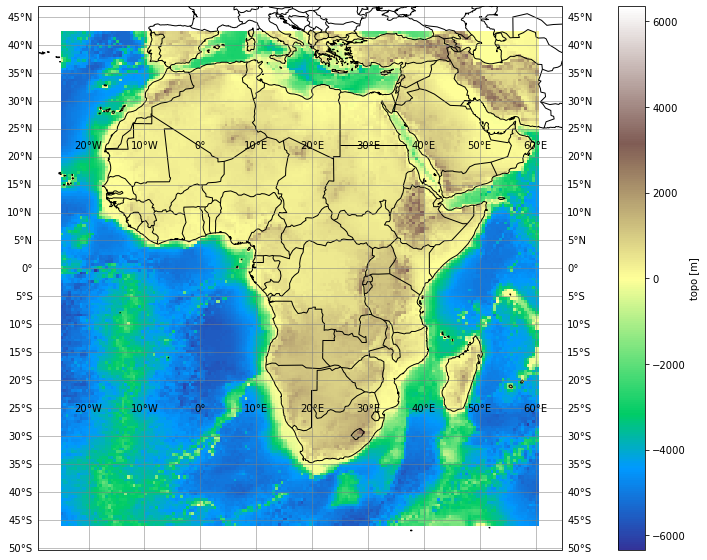

In [22]:
plot(afr11.topo, pole)

## Plot all cordex-core domains

We need a slightly modified plotting routine for this:

In [23]:
def plots(dsets, vmin=None, vmax=None, borders=True, title=''):
    """plot a domain using the right projection with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    import matplotlib.patheffects as pe
    plt.figure(figsize=(20,10))
    projection = ccrs.PlateCarree()
    #transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
    #ax = plt.axes(projection=projection)
    ax = plt.axes(projection=projection)
    #ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', 
                      xlocs=range(-180,180,15), ylocs=range(-90,90,10))
    #path_effects = [pe.Stroke(linewidth=50, foreground='g'), pe.Normal()]
    for ds in dsets:
        pole = ds.rotated_latitude_longitude.grid_north_pole_longitude, ds.rotated_latitude_longitude.grid_north_pole_latitude
        transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
        ds.topo.plot(ax=ax, cmap='terrain', transform=transform, vmin=vmin, vmax=vmax, 
                     x='rlon', y='rlat', add_colorbar=False)
    ax.coastlines(resolution='50m', color='black', linewidth=1)
    if borders: ax.add_feature(cf.BORDERS)
    ax.set_title('')

Now, let's plot all cordex core domains into one overview:

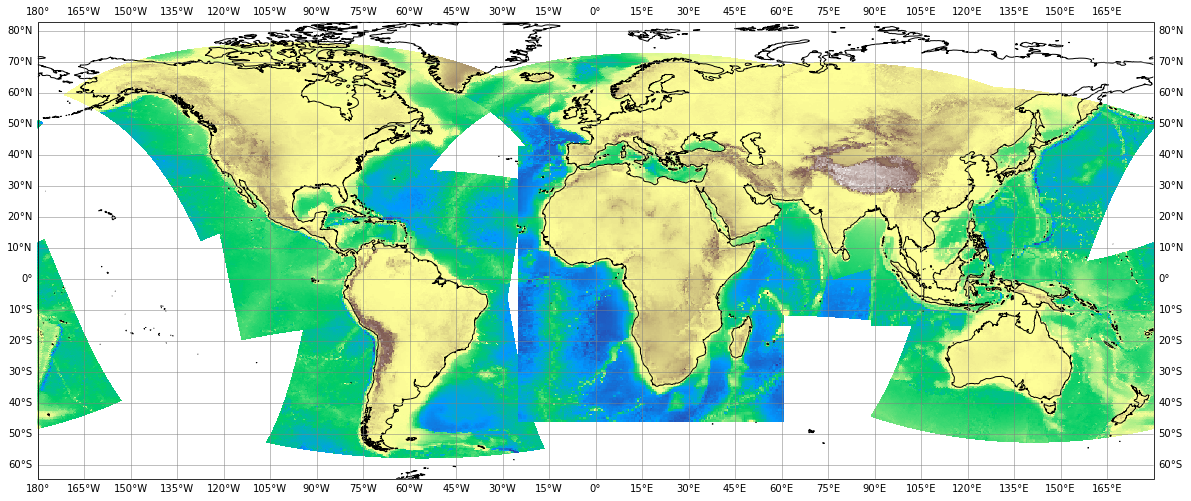

In [24]:
plots([dm.cordex_domain(name, dummy='topo') for name in dm.tables['cordex-core'].index], borders=False)

## Using the grid information for interpolation

The gridded Cordex datasets are particular usefule for regridding either with `CDO` or other interpolation packages.

We will use some CMIP6 model data from the ESGF to show how we can do the regridding:

In [25]:
import xarray as xr
#ds = xr.open_dataset("https://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/tas/gn/v20190710/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc")
ds = xr.open_dataset("http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc", chunks={'time':1})
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1200)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           144000.0
    creation_date:                   2019-04-05T16:02:56Z
    ...                              ...
    variable_id:                     tas
    variant_label:                   r1i1p1f2
    license:                         CMIP6 model data produced by the Met Off...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/255d149c-12fc-41f1-878d-034...
    DODS_EXTRA.Unlimited_Dimension:  time

### Interpolation using `CDO`

We will use `CDO`'s python bindings to control the cdo operators. Please note, that the python bindings in the background actually execute the cdo commands on the command line. `CDO` does have a huge IO overhead since it will always write a file between each operator step and will always need data from a file on the filesystem as input. If you give an xarray dataset as input (see below), the python binding will actually trigger a `to_netcdf` call to write the input as a temporary file to disk. You should be aware of this if you use huge xarray datasets as input.

We will first write the EUR-11 grid into a file on the disk so that we can use it as input to `CDO`

In [26]:
from cdo import Cdo
eur11.to_netcdf('EUR-11_grid.nc')

Now we will remap the first timestep of the CMIP6 modeldata to the EUR-11 grid:

In [27]:
remap_cdo = Cdo().remapbil('EUR-11_grid.nc', input=ds.isel(time=0), returnXArray = 'tas')
remap_cdo

<xarray.DataArray 'tas' (rlat: 412, rlon: 424)>
[174688 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.94 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.62 21.73 21.84
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K
    grid_mapping:   rotated_latitude_longitude
    comment:        near-surface (usually, 2 meter) air temperature
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-04-05T16:02:56Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 144 192]

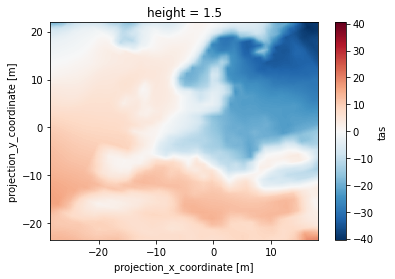

In [37]:
(remap_cdo - 273.5).plot()

### Alternative interpolation methods

A nice alternative is [xesmf](https://pangeo-xesmf.readthedocs.io) since it is based on xarray and will also very nicely work with dask.

In [29]:
import xesmf as xe

In [33]:
regridder = xe.Regridder(ds, eur11, "bilinear", periodic=True)
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_144x192_412x424_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (144, 192) 
Output grid shape:          (412, 424) 
Periodic in longitude?      True

In [34]:
remap_xe = regridder(ds.tas.isel(time=0))

/opt/anaconda3/envs/pyremo/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


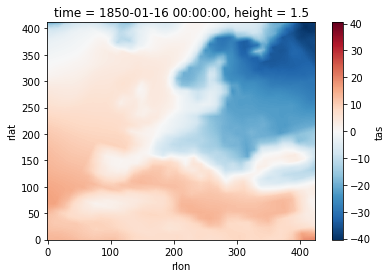

In [35]:
(remap_xe - 273.5).plot()

We can easily compare both approaches

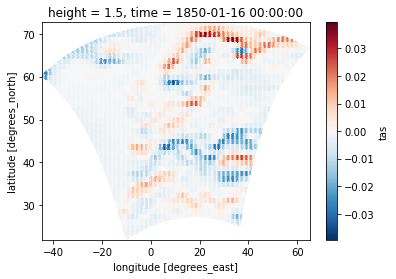

In [36]:
(remap_cdo - remap_xe).plot(x='lon', y='lat')

The nice thing about `xesmf` is that it works together with xarray and will keep all meta information. Another consequence is that `xesmf` [works well with dask](https://pangeo-xesmf.readthedocs.io/en/latest/notebooks/Dask.html) and it's vectorization. That means, if we have a long time axis along we want to regrid, this can easily be parallelized using, e.g., `dask.distributed` and will also work nicely with large datasets that don't fit into memory. The `xesmf` regridder can also store and reuse regridding weights for faster interpolation.